# Retrieving OpenStreetMap data

![](img/OSM_logo.png)

## What is OpenStreetMap?

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment.
It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. More details about OpenStreetMap and its contents are available in the [OpenStreetMap Wiki](https://wiki.openstreetmap.org/wiki/Main_Page).

OSM has a large userbase with more than 4 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains 5 billion nodes and counting! ([stats from November 2019](http://wiki.openstreetmap.org/wiki/Stats)).

OpenStreetMap is used not only for integrating the **OSM maps** as background maps to visualizations or online maps, but also for many other purposes such as **routing**, **geocoding**, **education**, and **research**. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development. Read more about humanitarian projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org).


## OSMnx

This week we will explore a Python module called [OSMnx](https://github.com/gboeing/osmnx)
that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called [NetworkX](https://networkx.github.io/documentation/stable/).

To get an overview of the capabilities of the package, see an introductory video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet the developer: Introduction to OSMnx package by Geoff Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

There is also a scientific article available describing the package:

- Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks) Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

## NetworkX

We will also use [NetworkX](https://networkx.github.io/documentation/stable/) to for manipulating and analyzing the street network data retrieved from OpenSTreetMap. NetworkX is a Python package that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate [shortest paths](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html)
along road networks using e.g. [Dijkstra's](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) or [A\* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm).

## Download and visualize OpenStreetMap data with OSMnx

One the most useful features that OSMnx provides is an easy-to-use way of retrieving [OpenStreetMap](http://www.openstreetmap.org) data (using [OverPass API](http://wiki.openstreetmap.org/wiki/Overpass_API)).

In this tutorial, we will learn how to download and visualize OSM data covering a specified area of interest: a district of Kamppi in Helsinki, Finland.

### Street network

OSMnx makes it really easy to do that as it allows you to specify an address to retrieve the OpenStreetMap data around that area. In fact, OSMnx uses the same Nominatim Geocoding API tthat we used for geocoding in Lesson 2.

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

Let's start by specifying ``"Kamppi, Helsinki, Finland"`` as the place from where the data should be downloaded. The place name should be *geocodable* which means that the place name should exist in the OpenStreetMap database (you can do a test search at https://www.openstreetmap.org/ or at https://nominatim.openstreetmap.org/ to verify that the place name is valid).  

In [2]:
# Specify the name that is used to seach for the data
place_name = "Kamppi, Helsinki, Finland"

Next, we will read in the OSM street network using OSMnx using the [graph_from_place](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph%20from#osmnx.graph.graph_from_place) function:

In [3]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

Check the data type of the graph:

In [4]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

What we have here is a networkx [MultiDiGraph](https://networkx.org/documentation/networkx-1.10/reference/classes.multidigraph.html) object. 

Let's have a closer look a the street nework. OSMnx has its own function [plot_graph()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=plot_graph#osmnx.plot.plot_graph) for visualizing graph objects. The function utilizes Matplotlib for visualizing the data,
hence as a result it returns a matplotlib figure and axis objects:


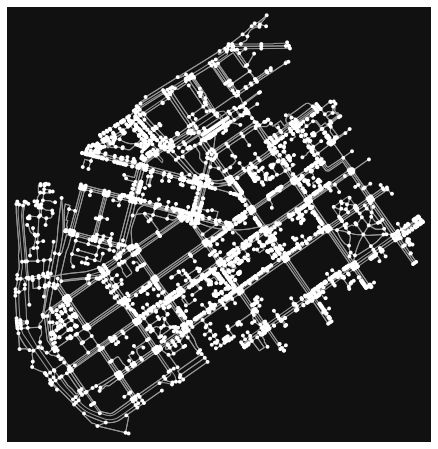

In [5]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

Great! Now we can see that our graph contains nodes (the points) and edges (the lines) that connects those nodes to each other.


### Graph to GeoDataFrame

We can now plot all these different OSM layers by using the familiar `plot()` function of Geopandas. As you might remember, the street network data is not a GeoDataFrame, but a graph object. Luckily, OSMnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

Let's extract the nodes and edges from the graph as GeoDataFrames:

In [6]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [7]:
nodes.head()

,y,x,osmid,highway,ref,geometry
25216594,60.164794,24.921057,25216594,NaN,NaN,POINT (24.92106 60.16479)
25238874,60.163665,24.921028,25238874,NaN,NaN,POINT (24.92103 60.16366)
25238883,60.163452,24.921441,25238883,crossing,NaN,POINT (24.92144 60.16345)
25238933,60.161114,24.924529,25238933,NaN,NaN,POINT (24.92453 60.16111)
25238944,60.164631,24.921286,25238944,NaN,NaN,POINT (24.92129 60.16463)


In [8]:
edges.head()

,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,tunnel,junction,access,bridge,service,ref,u,v,key
0,23717777,True,2,Porkkalankatu,primary,40,10.404,"LINESTRING (24.92106 60.16479, 24.92087 60.16479)",NaN,NaN,NaN,NaN,NaN,NaN,25216594,1372425721,0
1,23856784,True,2,Mechelininkatu,primary,40,40.885,"LINESTRING (24.92106 60.16479, 24.92095 60.164...",NaN,NaN,NaN,NaN,NaN,NaN,25216594,1372425714,0
2,29977177,True,3,Mechelininkatu,primary,40,5.843,"LINESTRING (24.92103 60.16366, 24.92104 60.16361)",NaN,NaN,NaN,NaN,NaN,NaN,25238874,336192701,0
3,122961573,True,NaN,Itämerenkatu,tertiary,40,10.879,"LINESTRING (24.92103 60.16366, 24.92083 60.16366)",NaN,NaN,NaN,NaN,NaN,NaN,25238874,1519889266,0
4,58077048,True,4,Mechelininkatu,primary,40,15.388,"LINESTRING (24.92144 60.16345, 24.92140 60.16359)",NaN,NaN,NaN,NaN,NaN,NaN,25238883,568147264,0


Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before.

<div class="alert alert-info">

**Note**

There are also other ways of retrieving the data from OpenStreetMap with OSMnx such as passing a Polygon to extract the data from that area, or passing Point coordinates and retrieving data around that location with specific radius. Take a look of this [tutorial to find out how to use those features of OSMnx](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb).


</div>

### Place polygon

Let's also plot the Polygon that represents our area of interest (Kamppi, Helsinki). We can retrieve the Polygon geometry using the [geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf) -function.

In [9]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

As the name of the function already tells us, `gdf_from_place()`returns a GeoDataFrame based on the specified place name query.
Let's still verify the data type: 

In [10]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

Let's also have a look at the data:

In [11]:
# Check data values
area

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...","Kamppi, Southern major district, Helsinki, Hel...",60.172075,60.160469,24.943453,24.920642


<AxesSubplot:>

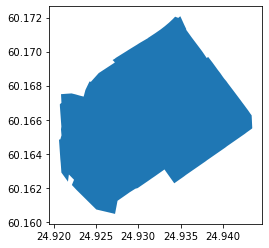

In [12]:
# Plot the area:
area.plot()

### Building footprints

It is also possible to retrieve other types of OSM data features with OSMnx such as buildings or points of interest (POIs). Let's download the buildings with `OSMnx` [geometries_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geometries_from_place#osmnx.geometries.geometries_from_place) -function and plot them on top of our street network in Kamppi. 

*Note: in OSMnx versions < 0.9 we used the `buildings_from_place` method to retrieve building footprints.*

When fetching spesific types of geometries from OpenStreetMap using OSMnx `geometries_from_place` we also need to specify the correct tags. For getting [all types of buildings](https://wiki.openstreetmap.org/wiki/Buildings), we can use the tag `building=yes`.

In [13]:
# List key-value pairs for tags
tags = {'building': True}

In [14]:
buildings = ox.geometries_from_place(place_name, tags)

Let's check how many building footprints we received:

In [15]:
len(buildings)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


430

Let's also have a look at the data:

In [16]:
buildings.head()

,unique_id,osmid,element_type,amenity,operator,geometry,source,access,addr:housenumber,addr:street,...,outdoor_seating,toilets,addr:floor,covered,area,ways,type,brand,brand:wikidata,electrified
0,way/8035238,8035238,way,NaN,NaN,"POLYGON ((24.93563 60.17045, 24.93557 60.17054...",NaN,NaN,22-24,Mannerheimintie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way/8042297,8042297,way,NaN,NaN,"POLYGON ((24.92938 60.16795, 24.92933 60.16797...",NaN,NaN,2,Runeberginkatu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way/14797170,14797170,way,NaN,City of Helsinki,"POLYGON ((24.92427 60.16648, 24.92427 60.16650...",survey,NaN,10,Lapinlahdenkatu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/14797171,14797171,way,NaN,NaN,"POLYGON ((24.92390 60.16729, 24.92391 60.16731...",survey,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/14797172,14797172,way,NaN,NaN,"POLYGON ((24.92647 60.16689, 24.92648 60.16689...",survey,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see, there are several columns in the buildings-layer. Each column contains information about a spesific tag that OpenStreetMap contributors have added. Each tag consists of a key (the column name), and several potential values (for example `building=yes` or `building=school`). Read more about tags and tagging practices in the [OpenStreetMap wiki](https://wiki.openstreetmap.org/wiki/Tags). 

In [17]:
buildings.columns

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['unique_id', 'osmid', 'element_type', 'amenity', 'operator', 'geometry',
       'source', 'access', 'addr:housenumber', 'addr:street',
       ...
       'outdoor_seating', 'toilets', 'addr:floor', 'covered', 'area', 'ways',
       'type', 'brand', 'brand:wikidata', 'electrified'],
      dtype='object', length=101)

### Points-of-interest

It is also possible to retrieve other types of geometries from OSM using the `geometries_from_place` by passing different tags. Point-of-interest (POI) is a generic concept that describes point locations that represent places of interest. 

In OpenStreetMap, many POIs are described using the [amenity-tags](https://wiki.openstreetmap.org/wiki/Key:amenityhttps://wiki.openstreetmap.org/wiki/Key:amenity). 
We can, for excample, retrieve all restaurat locations by referring to the tag `amenity=restaurant`. See all available amenity categories from [OSM wiki](https://wiki.openstreetmap.org/wiki/Key:amenity). 

*Note: We used the `pois_from_place()` method to retrieve POIs in older versions of OSMnx.*

Let's retrieve restaurants that are located in our area of interest:

In [18]:
# List key-value pairs for tags
tags = {'amenity': 'restaurant'}

In [19]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, tags)

# How many restaurants do we have?
len(restaurants)

156

As we can see, there are quite many restaurants in the area.

Let's explore what kind of attributes we have in our restaurants GeoDataFrame:

In [20]:
# Available columns
restaurants.columns.values

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['unique_id', 'osmid', 'element_type', 'addr:city', 'addr:country',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'amenity',
       'cuisine', 'name', 'phone', 'website', 'wheelchair', 'geometry',
       'toilets:wheelchair', 'opening_hours', 'delivery:covid19',
       'opening_hours:covid19', 'takeaway:covid19', 'diet:vegetarian',
       'name:fi', 'name:zh', 'short_name', 'diet:vegan', 'contact:phone',
       'contact:website', 'source', 'outdoor_seating', 'addr:housename',
       'email', 'level', 'address', 'access:covid19',
       'drive_through:covid19', 'takeaway', 'delivery', 'url', 'brunch',
       'lunch:menu', 'reservation', 'room', 'opening_hours:brunch',
       'toilets', 'capacity', 'smoking', 'access:dog', 'operator', 'shop',
       'alt_name', 'contact:email', 'established', 'description',
       'name:sv', 'floor', 'name:en', 'description:en', 'old_name',
       'highchair', 'lunch', 'was:name', 'website:en', 'brand',
       'wheelchair:description',

As you can see, there is quite a lot of (potential) information related to the amenities. Let's subset the columns and inspect the data further. Useful columns include at least `name`, `address information` and `opening_hours` information:

In [21]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'addr:country', 
        'addr:housenumber', 'addr:postcode', 'addr:street']

# Print only selected cols
restaurants[cols].head(10)

,name,opening_hours,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street
0,Kabuki,NaN,Helsinki,FI,12,00180,Lapinlahdenkatu
1,Empire Plaza,NaN,NaN,NaN,NaN,NaN,NaN
2,Johan Ludvig,NaN,Helsinki,FI,NaN,NaN,NaN
3,Ravintola Rivoletto,Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 15:00-24...,Helsinki,FI,38,00120,Albertinkatu
4,Pueblo,NaN,Helsinki,FI,NaN,NaN,Eerikinkatu
5,Atabar,NaN,Helsinki,FI,NaN,NaN,Eerikinkatu
6,Papa Albert,"Mo-Th 10:00-14:00, 17:30-22:00; Fr 11:00-23:00...",Helsinki,FI,30,00120,Albertinkatu
7,Ravintola China,Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off,Helsinki,FI,25,00100,Annankatu
8,Tony's deli + Street Bar,NaN,Helsinki,FI,7,00120,Bulevardi
9,Haru Sushi,Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00,Helsinki,FI,30,00120,Fredrikinkatu


As we can see, there is a lot of useful information about restaurants that can be retrieved easily with OSMnx. Also, if some of the information need updating, you can go over to www.openstreetmap.org and edit the source data! :)

### Plotting the data

Let's create a map out of the streets, buildings, restaurants, and the area Polygon but let's exclude the nodes (to keep the figure clearer).

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


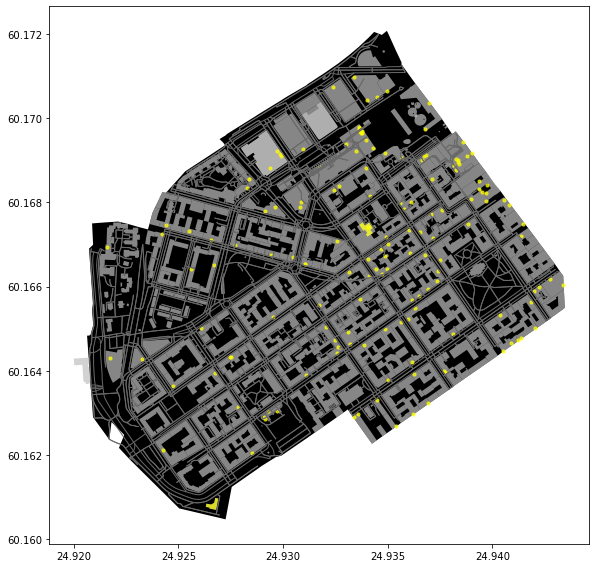

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

Cool! Now we have a map where we have plotted the restaurants, buildings, streets and the boundaries of the selected region of 'Kamppi' in Helsinki. And all of this required only a few lines of code. Pretty neat! 


<div class="alert alert-info">

**Check your understading**

Retrieve OpenStreetMap data from some other area! Download these elements using OSMnx functions from your area of interest:
    
- Extent of the area using `geocode_to_gdf()`
- Street network using `graph_from_place()`, and convert to gdf using `graph_to_gdfs()`
- Building footprints (and other geometries) using `geometries_from_place()` and appropriate tags.
    
*Note, the larger the area you choose, the longer it takes to retrieve data from the API! Use parameter `network_type=drive` to limit the graph query to filter out un-driveable roads.*

</div>

In [23]:
# Specify the name that is used to seach for the data. Check that the place name is valid from https://nominatim.openstreetmap.org/ui/search.html
my_place = ""

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get street network


In [ ]:
# Get building footprints


In [ ]:
# Plot the data


### Extra: Park polygons
Notice that we can retrieve all kinds of different features from OpenStreetMap using the [geometries_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geometries_from_place#osmnx.geometries.geometries_from_place) method by passing different OpenStreetMap tags.

Let's try to fetch all public parks in the Kamppi area. In OpenStreetMap, parks are often tagged as `leisure=park`. We can also add other green surfaces, such as `landuse=grass`. see OpenStreetMap, and OSM wiki for more details.

- We need to start by fetching all footprints from the tag `leisure`:

In [24]:
# List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass'}

In [25]:
# Get the data
parks = ox.geometries_from_place(place_name, tags)

# Check the result
print("Retrieved", len(parks), "objects")

Retrieved 53 objects


let's check the first rows:

In [26]:
parks.head(3)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,geometry,access,source,addr:city,nodes,leisure,name,name:fi,name:sv,hoitoluokitus_viheralue,wikidata,wikipedia,landuse,alt_name,loc_name
0,way/8042256,8042256,way,"POLYGON ((24.93566 60.17132, 24.93566 60.17130...",NaN,NaN,NaN,"[292719496, 1001543836, 1037987967, 1001544060...",park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way/8042613,8042613,way,"POLYGON ((24.93701 60.16947, 24.93627 60.16919...",NaN,NaN,NaN,"[552965718, 293390264, 295056669, 256264975, 1...",park,Simonpuistikko,Simonpuistikko,Simonsskvären,NaN,NaN,NaN,NaN,NaN,NaN
2,way/15218362,15218362,way,"POLYGON ((24.92330 60.16499, 24.92323 60.16500...",NaN,survey,NaN,"[144181223, 150532964, 150532958, 150532966, 1...",park,Työmiehenpuistikko,Työmiehenpuistikko,Arbetarparken,A2,NaN,NaN,NaN,NaN,NaN


Check all column headers:

In [27]:
parks.columns.values

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['unique_id', 'osmid', 'element_type', 'geometry', 'access',
       'source', 'addr:city', 'nodes', 'leisure', 'name', 'name:fi',
       'name:sv', 'hoitoluokitus_viheralue', 'wikidata', 'wikipedia',
       'landuse', 'alt_name', 'loc_name'], dtype=object)

plot the parks:

<AxesSubplot:>

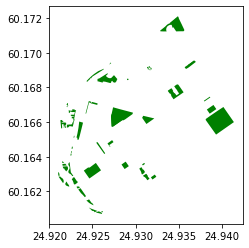

In [28]:
parks.plot(color="green")

Finally, we can add the park polygons to our map:

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


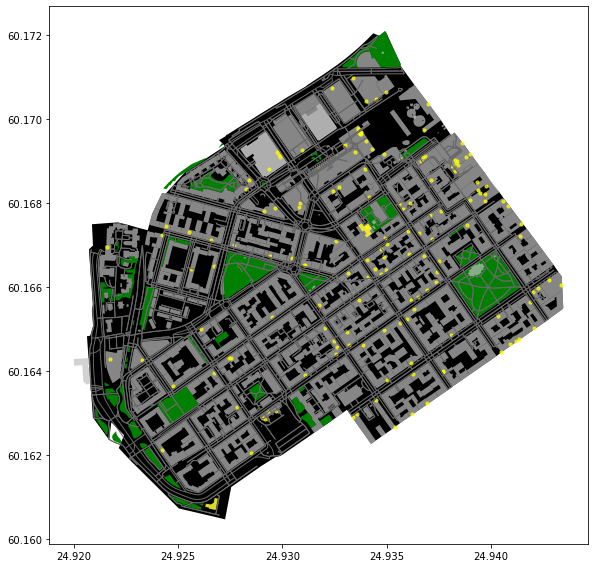

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()